In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Bicycle dataset downloaded from [kaggle](https://www.kaggle.com/marklvl/bike-sharing-dataset?select=hour.csv).

In [2]:
df = pd.read_csv("/tmp/hour.csv")
df["dteday"] = df["dteday"] + " " + df["hr"].astype(str).str.zfill(2)
df["dteday"] = pd.to_datetime(df["dteday"], format="%Y-%m-%d %H")

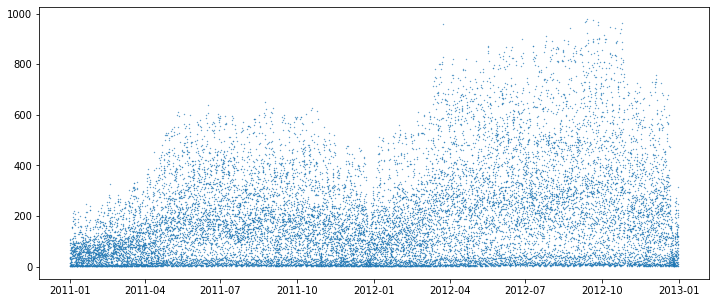

In [3]:
plt.figure(figsize=(12, 5))
plt.scatter(df["dteday"], df["cnt"], s=0.1)
plt.show()

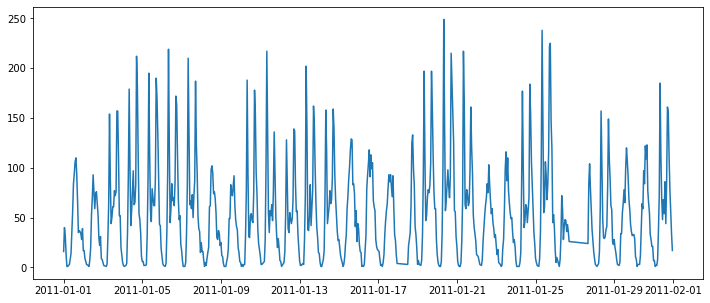

In [4]:
plt.figure(figsize=(12, 5))
idx = df["dteday"] < "2011-02-01"
plt.plot(df.loc[idx, "dteday"], df.loc[idx, "cnt"])
plt.show()

Just because we have same the model structure, does not mean that you will get the same answer if you have different loss functions. See especially the motivation section in [this wikipedia page](https://en.wikipedia.org/wiki/Huber_loss).

In [5]:
from sklearn.linear_model import HuberRegressor, LinearRegression

/Users/sachinthaka/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


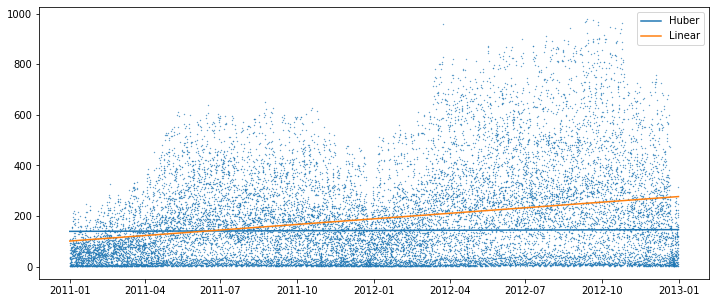

In [6]:
huber_model = HuberRegressor()
lin_model = LinearRegression()
df["t"] = df["dteday"].astype(int) / (3600 * 24 * 1e9)
t = df["t"].values[:, None]
y = df["cnt"].values[:, None]
huber_model.fit(t, y)
lin_model.fit(t, y)

huber_pred = huber_model.predict(t)
lin_pred = lin_model.predict(t)

plt.figure(figsize=(12, 5))
plt.scatter(df["dteday"], df["cnt"], s=0.1)
plt.plot(df["dteday"], huber_pred, label="Huber")
plt.plot(df["dteday"], lin_pred, label="Linear")
plt.legend()
plt.show()

In [7]:
huber_model.coef_, lin_model.coef_

(array([0.00932217]), array([[0.24029713]]))